In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint
from pandasql import sqldf

In [23]:
# os.listdir()
df_q4 = pd.read_csv("q4.txt", delimiter=" ", header = None)
df_q4.columns = ["time", "mat_size", "power", "num_th", "blk_size"]
df_q4

,time,mat_size,power,num_th,blk_size
0,80.87,2048,2,1,4.0
1,77.01,2048,2,1,8.0
2,84.37,2048,2,1,16.0
3,79.17,2048,2,1,32.0
4,76.80,2048,2,1,64.0
...,...,...,...,...,...
1120,0.71,512,16,16,4.0
1121,1.31,512,16,16,8.0
1122,0.51,512,16,16,16.0
1123,0.47,512,16,16,32.0


In [24]:
def print_graphs1(df_q4, fixattr1, a1_val ,fixattr2, a2_val , var_attr, var_vals , req_attr, print_attr, print_val):
    df_arr = []
    for val in var_vals:
        
        q = '''SELECT * FROM df_q4 WHERE {} = {} AND {} = {} AND {} = {}'''
        q1 = q.format(fixattr1, a1_val, fixattr2, a2_val, var_attr, val)
                
        temp_df = sqldf(q1)
        df_arr.append(temp_df)
        
    
    plt.figure(figsize=(16,6))
    for i in range(len(df_arr)):
        plt.plot(df_arr[i][req_attr], df_arr[i]['time'], label = var_attr + "=" + str(var_vals[i]), marker="o")

    plt.legend()
    plt.xlabel("Number of Threads")
    plt.ylabel("Time(sec)")
    plt.title("{} = {}".format(print_attr, print_val))
    plt.show()


In [25]:
blk_vals = [4,8,16,32,64]
pow_vals = [i for i in range(2,17)]
num_th = [1,  2,  4,  8, 16]
mat_sizes = [512,1024,2048]

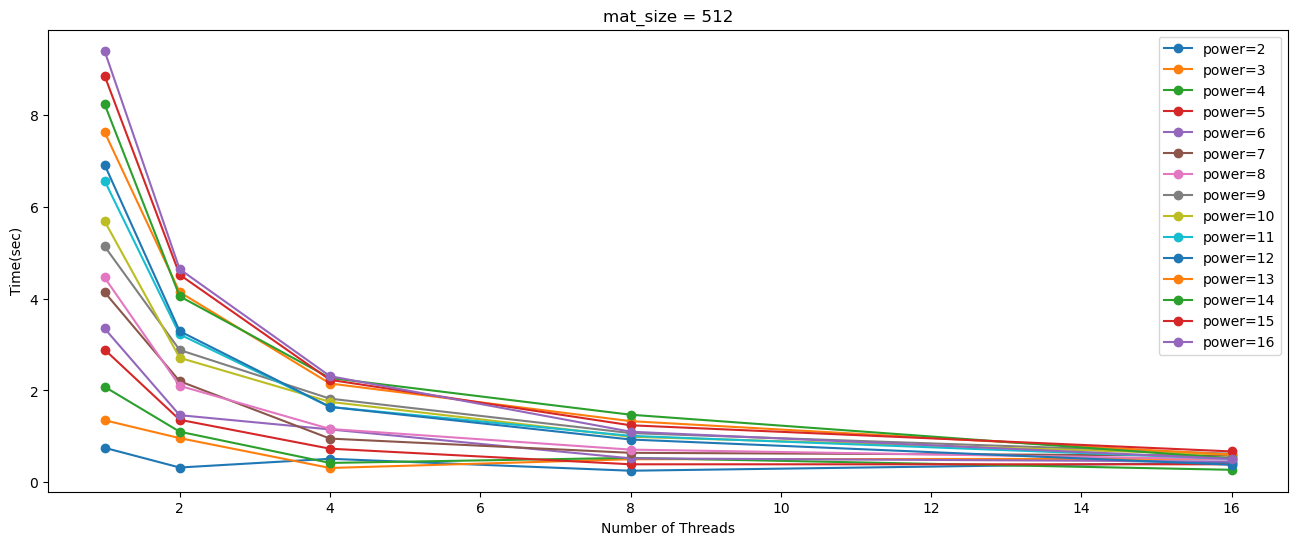

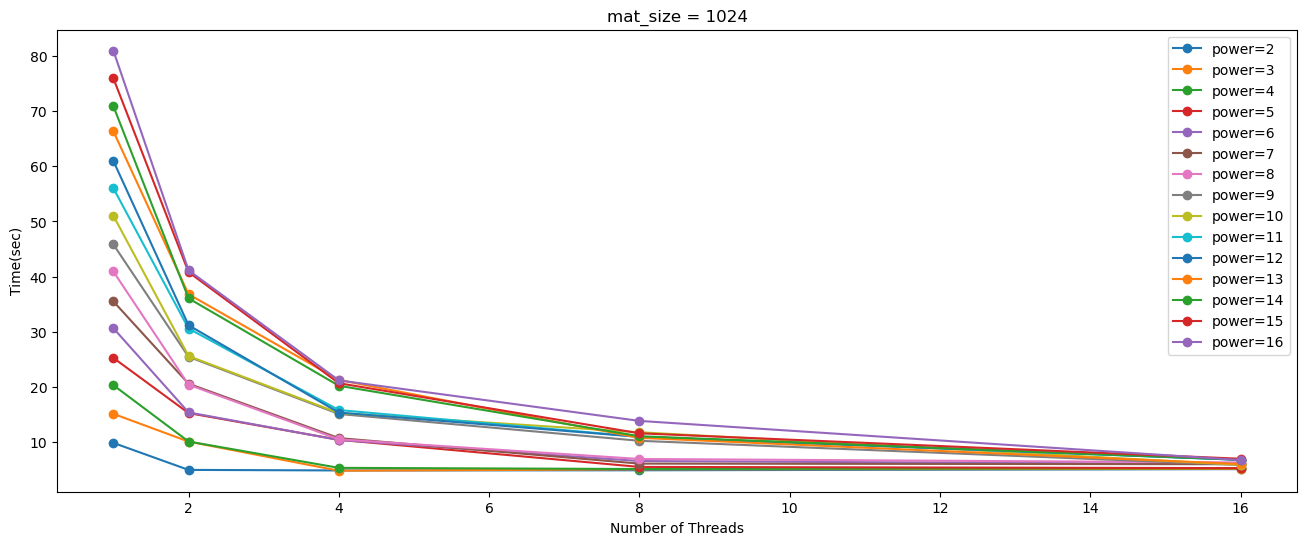

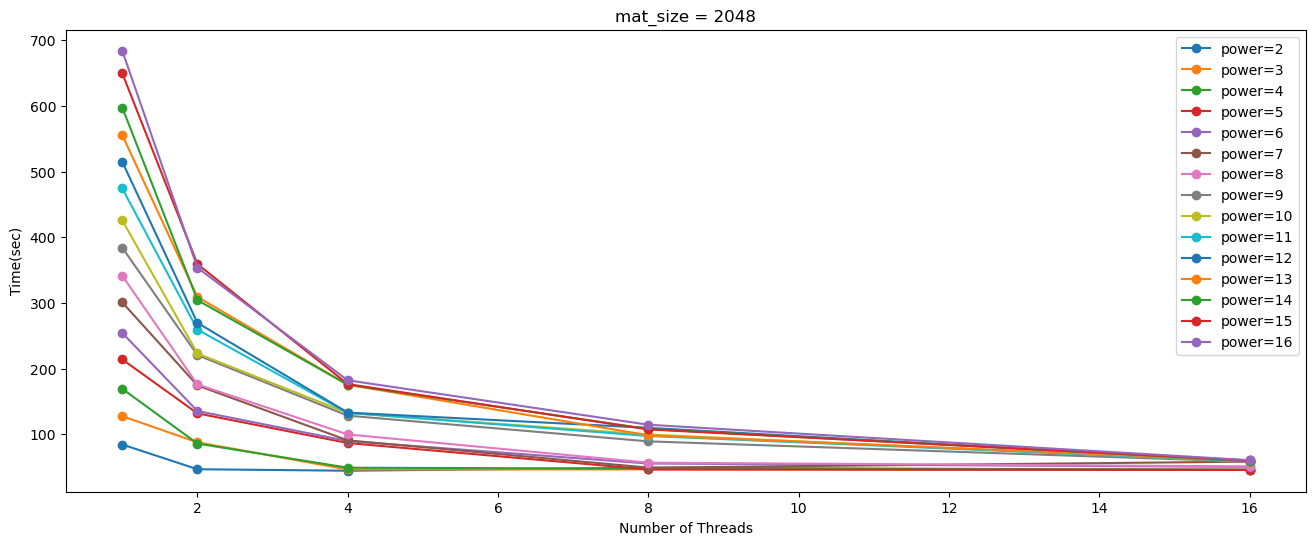

In [26]:
for matsize in mat_sizes:
    print_graphs1(df_q4,"mat_size", matsize , "blk_size", 16 , "power" , pow_vals , "num_th", "mat_size", matsize)

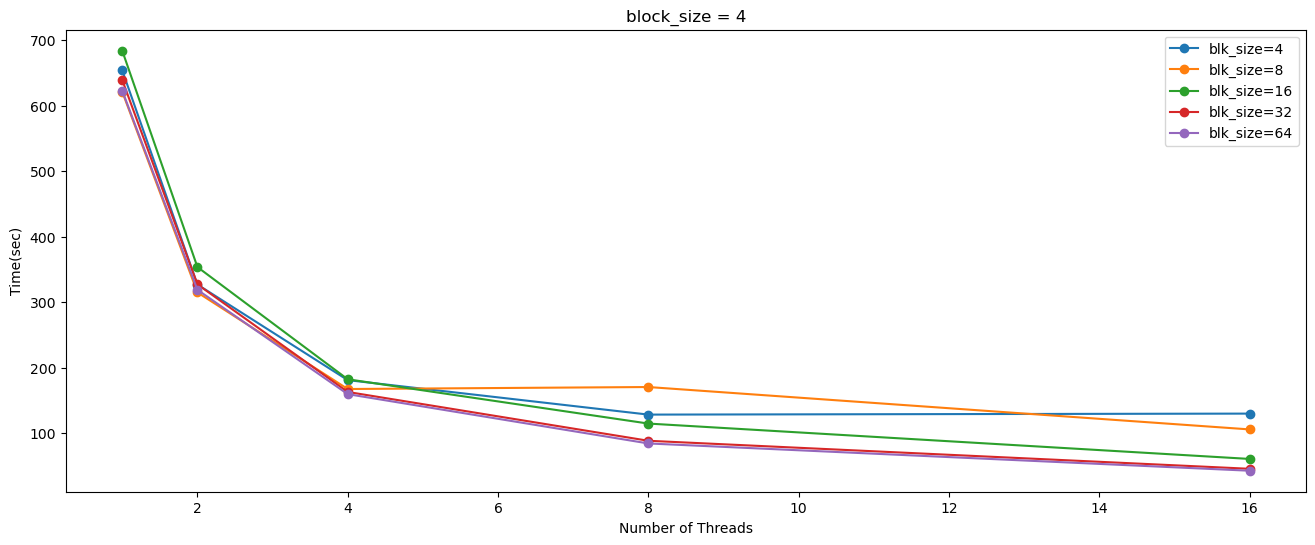

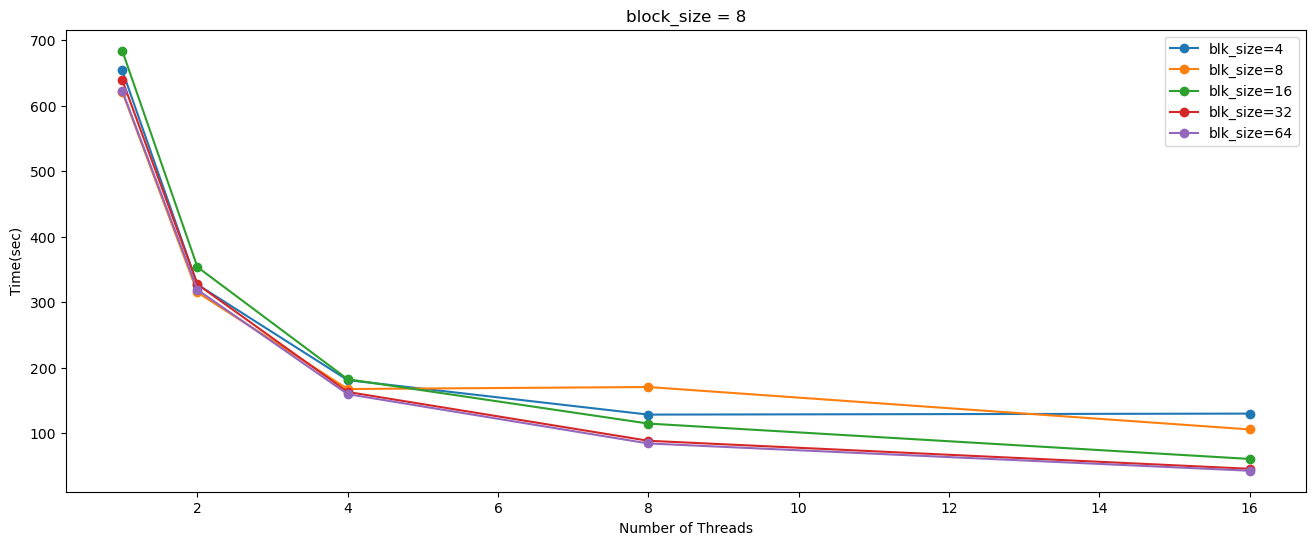

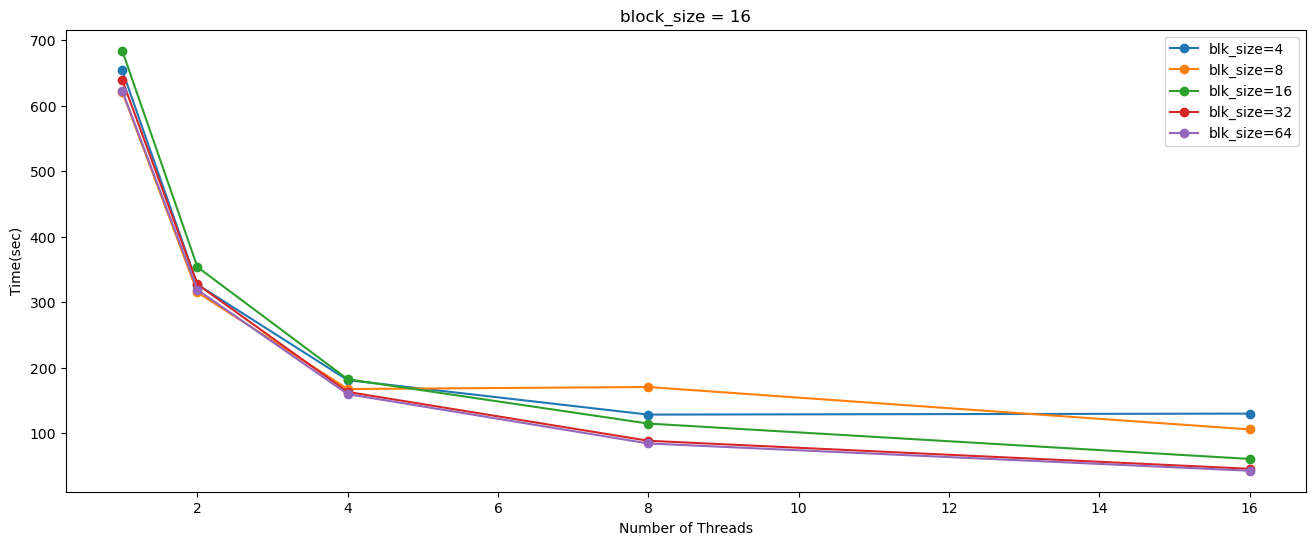

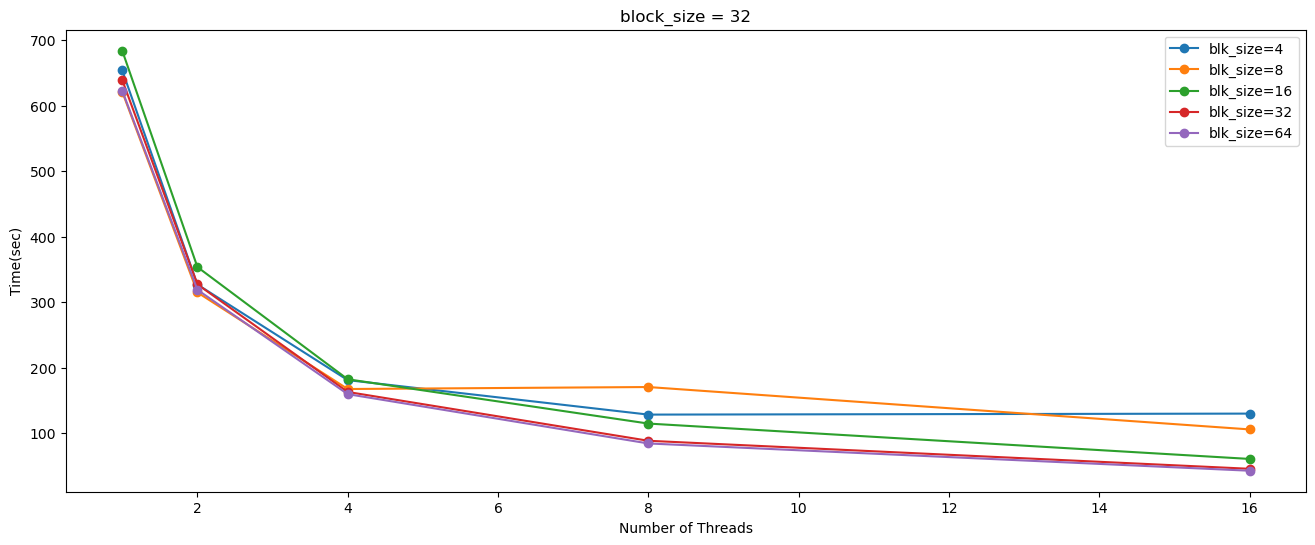

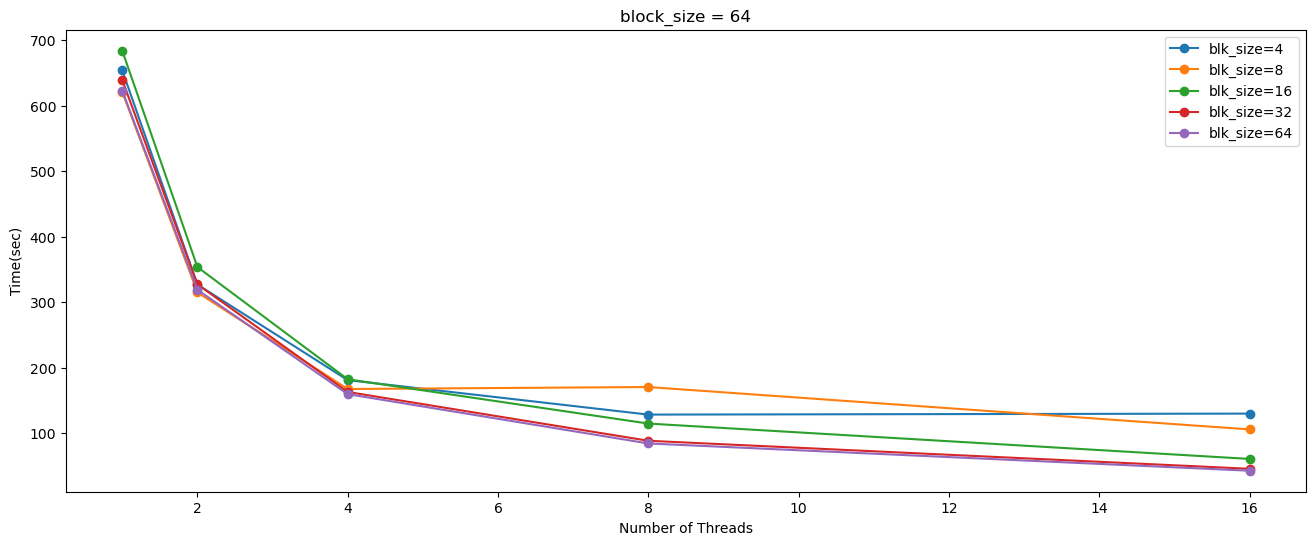

In [27]:
for blksize in blk_vals:
    print_graphs1(df_q4, "power",  16, "mat_size", 2048 , "blk_size" , blk_vals , "num_th", "block_size", blksize)

In [29]:
df_q4.to_csv("q4_op.dat", sep = "|")